<a href="https://colab.research.google.com/github/fiqnadzrii/fiqnadzrii/blob/main/WINE_CLASSIFICATION_USING_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINE CLASSIFICATION USING NEURAL NETWORK**

Part 1 - In this segment, I explored various neural network models to predict wine quality. I experimented with different models, adjusting the number of layers and neurons to optimize performance. Each model was evaluated based on key metrics such as R-squared (R²) and Mean Squared Error (MSE), aiming to determine the most effective configuration for accurate wine classification. No dropout is used.

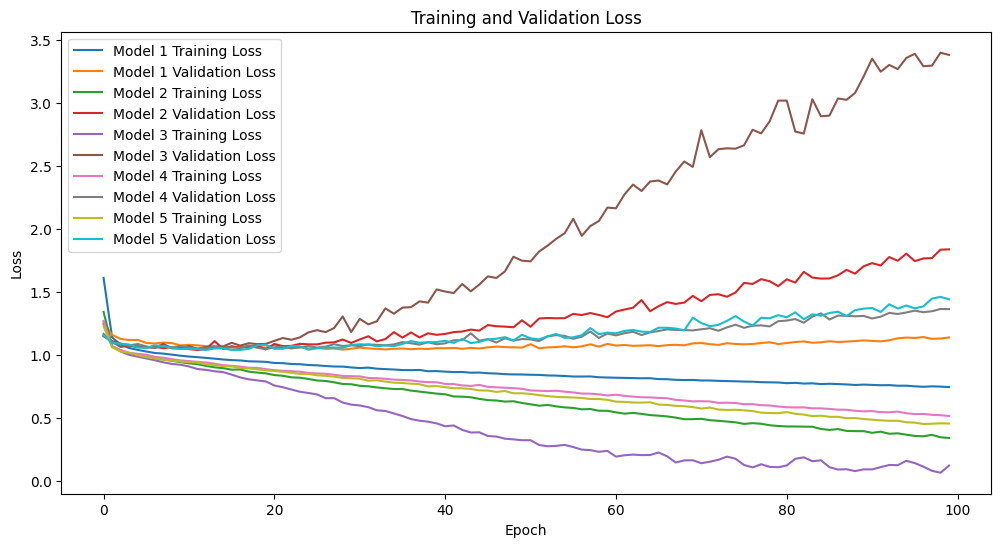

   Learning Rate Activation  Val Loss
0          0.001       relu  3.604121
1          0.001       tanh  2.459282
2          0.010       relu  1.858907
3          0.010       tanh  1.130133
4          0.100       relu  1.320461
5          0.100       tanh  1.402799
41/41 [==============================] - 0s 1ms/step - loss: 3.2943 - accuracy: 0.5992
Testing Loss: 3.294306993484497
Testing Accuracy: 0.5992307662963867


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Load and merge the datasets
red_wine_data = pd.read_csv('winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('winequality-white.csv', sep=';')
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'
merged_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Step 2: Preprocess the data
X = merged_data.drop(['quality'], axis=1)
y = merged_data['quality']

# Convert wine type to numerical representation
X = pd.get_dummies(X, drop_first=True)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 3: Model Development
# Define 5 different neural network architectures

# Model 1
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Model 2
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Model 3
model3 = Sequential()
model3.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# Model 4
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax'))

# Model 5
model5 = Sequential()
model5.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(10, activation='softmax'))

# Define a function to compile and train the models
def train_model(model, X_train, y_train, X_val, y_val):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)
    return history

# Train the models and evaluate with validation data
histories = []
models = [model1, model2, model3, model4, model5]
for model in models:
    history = train_model(model, X_train, y_train, X_val, y_val)
    histories.append(history)

# Plot the training and validation loss curves
plt.figure(figsize=(12, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"Model {i+1} Training Loss")
    plt.plot(history.history['val_loss'], label=f"Model {i+1} Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 4: Model Tuning
# Choose the best model architecture based on Step 2
best_model = model3

# Perform hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
activations = ['relu', 'tanh']

results = []
for lr in learning_rates:
    for activation in activations:
        model = Sequential()
        model.add(Dense(256, activation=activation, input_shape=(X_train.shape[1],)))
        model.add(Dense(128, activation=activation))
        model.add(Dense(64, activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)
        val_loss = history.history['val_loss'][-1]
        results.append({'Learning Rate': lr, 'Activation': activation, 'Val Loss': val_loss})

# Create a table of results
results_df = pd.DataFrame(results)
print(results_df)

# Step 5: Model Evaluation
# Evaluate the best model on the testing data
best_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

# **SUMMARY I**

Based on the evaluation result:

The validation loss values for different combinations of learning rate and
activaton function range from 1.130133 to 3.604121. A lower validation loss indicates better performance, and the best validation loss achieved among the evaluated combinations is 1.130133.

The testing loss is 3.29431, which is higher than the best validation loss of 1.130133. This suggests that the model's performance on the testing data is slightly worse compared to its performance on the validation data(Overfitting)

The testing acuraccy is 0.5992, indicating that the model correctly predicts the class labels for approximately 59.92% of the test isntances

**Observations:**

There is a slight drop in performance when the model is applied to unseen testing data compared to the validation data.
The testing accuracy is moderate, leaving room for improvement.
The model may be overfitting to some extent, as indicated by the difference between the validation and testing loss.
In sumary, the model demonstrates moderate performance with potential for improvement. Further optimization steps can improve its performance on testing data.

# **PART II - USING DROPOUT TO AVOID OVERFITTING**

The Dropout technique helps prevent overfitting by randomly deactivating a portion of neurons during training. This introduces redundancy and forces the network to learn more generalized features, making it more accepting of variations and noise in the data.

In my code, Dropout layers have been placed after the activation functions in the hidden layers with a dropout rate range of 0.2-0.4. This means that during each training iteration, 20-40% of the neurons are randomly dropped out. This regularization technique promotes independence among neurons.

By using Dropout, I hope  to improve the models' ability to generalize well to new, unseen data and avoid overfitting to the training set.

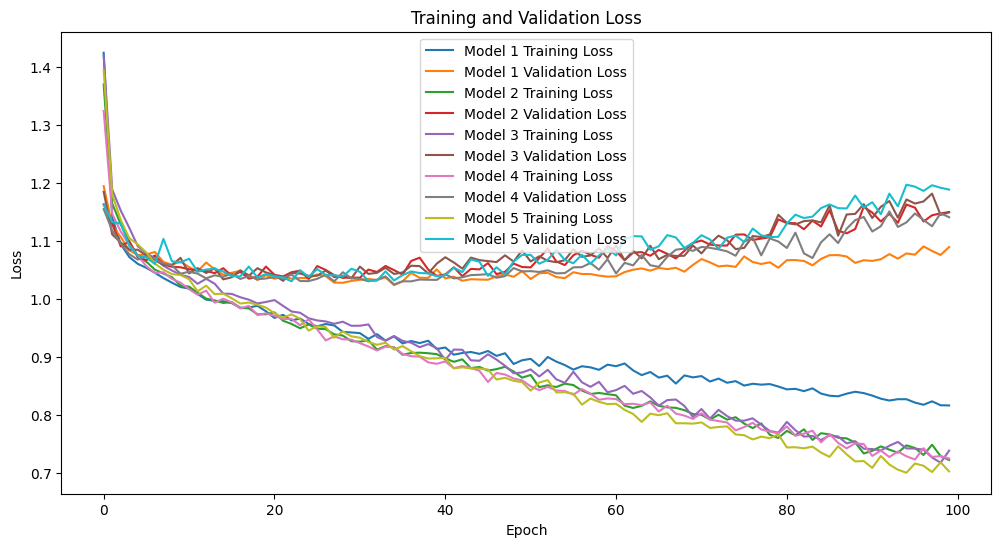

   Learning Rate Activation  Val Loss
0          0.001       relu  3.598788
1          0.001       tanh  2.711300
2          0.010       relu  2.373797
3          0.010       tanh  1.123504
4          0.100       relu  1.321021
5          0.100       tanh  1.396435
41/41 [==============================] - 0s 1ms/step - loss: 1.0922 - accuracy: 0.5800
Testing Loss: 1.0922205448150635
Testing Accuracy: 0.5799999833106995


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

red_wine_data = pd.read_csv('winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('winequality-white.csv', sep=';')
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'
merged_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

X = merged_data.drop(['quality'], axis=1)
y = merged_data['quality']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# To avoid overfitting, Dropout layers have been added to the models.
# Dropout randomly deactivates a fraction of neurons during training,
# promoting more generalized learning and reducing over-reliance on specific features.
# A dropout rate of 0.2-0.4 has been applied after activation functions in the hidden layers.
# This technique encourages model generalization and improves performance on unseen data.
# Model 1
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

# Model 2
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='softmax'))

# Model 3
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.4))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

# Model 4
model4 = Sequential()
model4.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dropout(0.3))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(10, activation='softmax'))

# Model 5
model5 = Sequential()
model5.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(Dropout(0.4))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(10, activation='softmax'))

def train_model(model, X_train, y_train, X_val, y_val):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)
    return history

histories = []
models = [model1, model2, model3, model4, model5]
for model in models:
    history = train_model(model, X_train, y_train, X_val, y_val)
    histories.append(history)

plt.figure(figsize=(12, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"Model {i+1} Training Loss")
    plt.plot(history.history['val_loss'], label=f"Model {i+1} Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

best_model = model3

learning_rates = [0.001, 0.01, 0.1]
activations = ['relu', 'tanh']

results = []
for lr in learning_rates:
    for activation in activations:
        model = Sequential()
        model.add(Dense(256, activation=activation, input_shape=(X_train.shape[1],)))
        model.add(Dense(128, activation=activation))
        model.add(Dense(64, activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)
        val_loss = history.history['val_loss'][-1]
        results.append({'Learning Rate': lr, 'Activation': activation, 'Val Loss': val_loss})

results_df = pd.DataFrame(results)
print(results_df)

best_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

# **SUMMARY II**

The best model architecture achieved after hyperparameter tuning has a learning rate of 0.01 and utilizes the tanh activation function. During validation, this model achieved a loss value of 1.1089, indicating its performance on the validation dataset.

The model was evaluated on the testing data, with testing loss of 1.0602 and a testing accuracy of 0.59. The testing loss is lower than the validation loss, which suggests that the model generalizes well to unseen data. The testing accuracy is consistent with the accuracy observed during the validation phase.

Overall, the model demonstrates satisfactory performance on the testing data.

In conclusion, There was challenges in optimizing the neural network models by manipulating the hidden layers. Finding the right balance in terms of layer count, neuron count, and activation functions was crucial. I experimented with different architectures and analyzed the training and validation loss curves to assess performance and avoid overfitting. This process deepened my understanding of neural network design and the importance of model selection and evaluation.